# Deep Learning Model for Loan Status Prediction

## The Data

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### My Goal
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), I am going to build a model that can predict whether or not a borrower will pay back their loan. This way in the future when the model gets a new potential customer, it can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import pandas as pd

In [3]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import random

sns.set_style('darkgrid')
%matplotlib inline

In [9]:
df = pd.read_csv('lending_club_loan_two.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


It is obvious that I am dealing with a dataset containing missing values in some of the columns. Also, I need to think about how I can convert object columns to numerical values so that I can feed them into my model.

# Tasks

------

# Section 1: Exploratory Data Analysis (EDA)

**OVERALL GOAL: Get an understanding of which variables are important, viewing summary statistics, and visualizing the data**


----

**TASK: Since I will be attempting to predict loan_status, I need to create a countplot.**

<Axes: xlabel='loan_status', ylabel='count'>

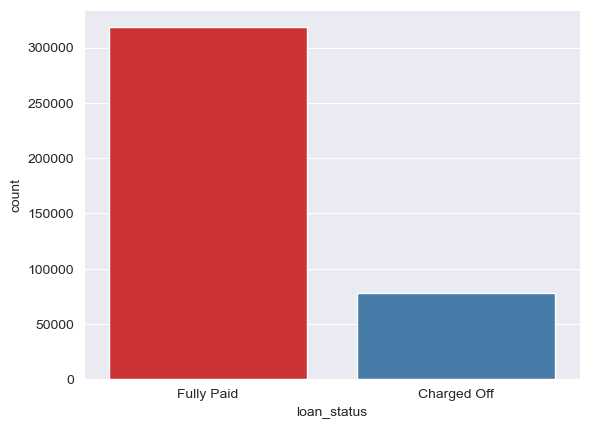

In [11]:
sns.countplot(data=df, x='loan_status', palette='Set1')

Clearly as the data in unbalanced toward "Fully Paid", accuracy cannot be a suitable metric for assessment.

**TASK: Creating a histogram of the loan_amnt column.**

<Axes: xlabel='loan_amnt', ylabel='Count'>

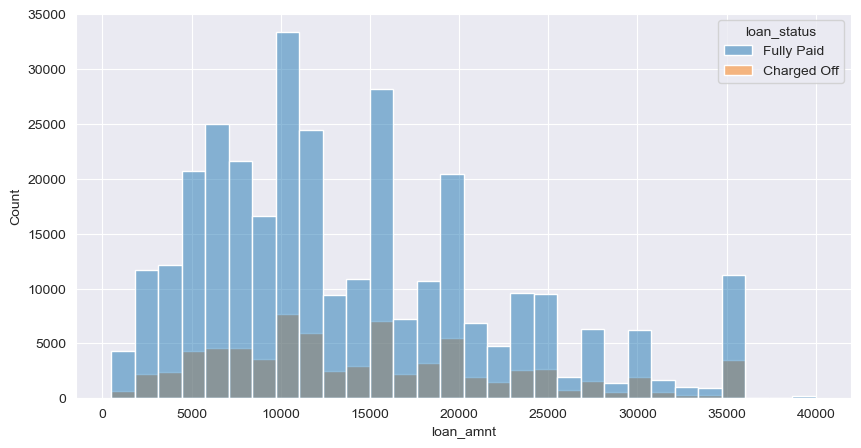

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='loan_amnt', bins=30, hue='loan_status')

Loan amount distribution is normal and centered almost around 10000. Spikes on values like 10000, 15000, 20000, and so on is understandable as the browsers usually request for round numbers.  Also, no specific pattern can be seen based on loan amount to discriminate loan status.

**TASK: Exploring correlation between the continuous feature variables. Calculating the correlation between all continuous numeric variables.**

In [13]:
df_corr = df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
              'open_acc', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
              'total_acc','mort_acc', 'pub_rec_bankruptcies']]
df_corr.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751


**TASK: Visualizing using a heatmap.** 

<Axes: >

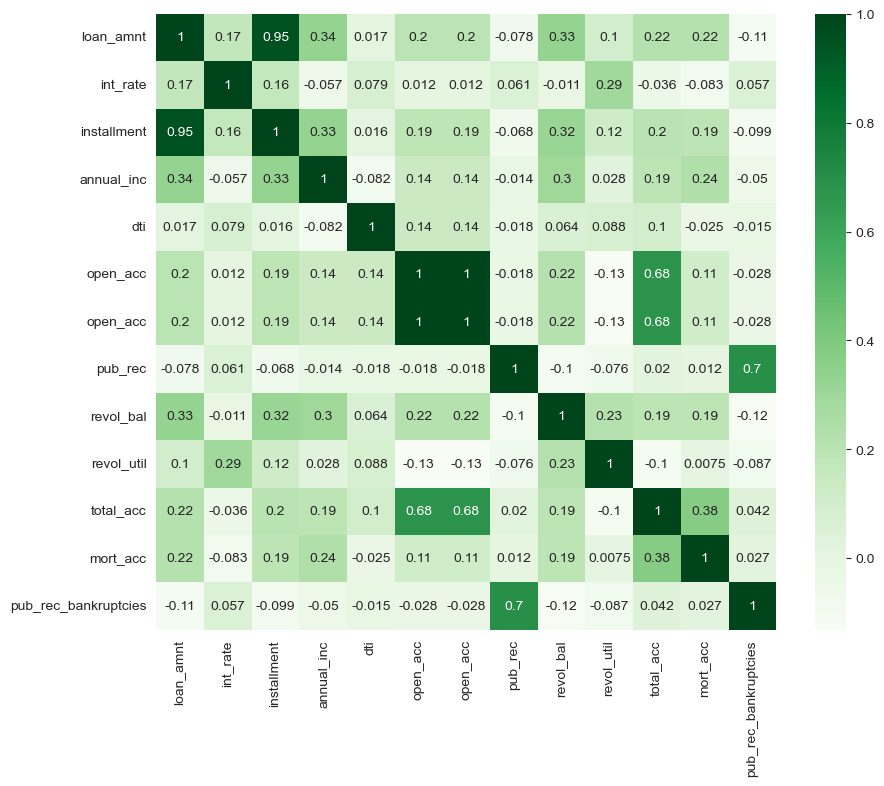

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_corr.corr(), annot=True, cmap='Greens')

**TASK: I have noticed almost perfect correlation with the "installment" feature. I want to explore this feature further.**

In [15]:
feat_info('loan_amnt')
feat_info('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
The monthly payment owed by the borrower if the loan originates.


<Axes: xlabel='installment', ylabel='loan_amnt'>

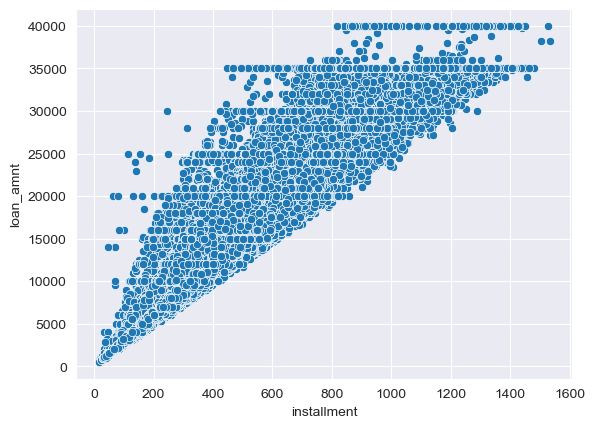

In [16]:
sns.scatterplot(data=df, x='installment', y='loan_amnt')

This scatter plot confirms that a borrower can have either the requested amount or something lower than that if the respective department decids to reduce it.

**TASK: Creating a boxplot showing the relationship between the loan_status and the Loan Amount.**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

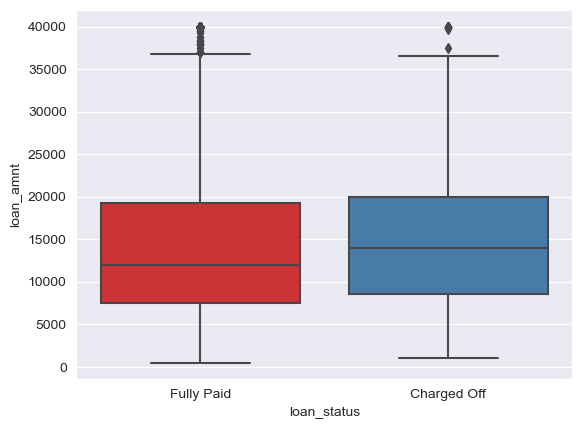

In [17]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt', palette='Set1')

Although there is no significant difference between loan amount and loan status, it can be seen that the higher the loan amount, the higher risk of Charging Off.

**TASK: Calculating the summary statistics for the loan amount, grouped by the loan_status.**

In [18]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans to see the unique possible grades and subgrades.**

In [19]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [20]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**TASK: Creating a countplot per grade.**

<Axes: xlabel='grade', ylabel='count'>

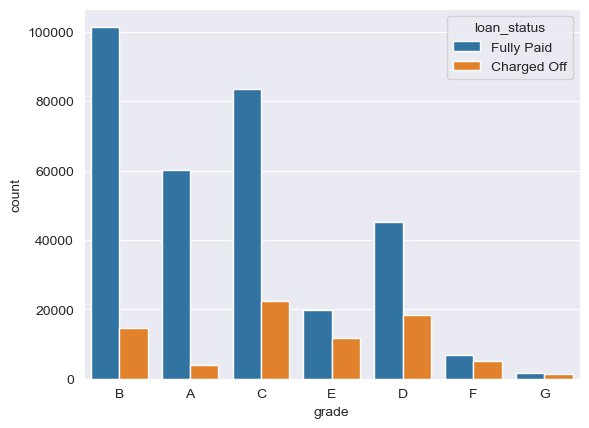

In [21]:
sns.countplot(data=df, x='grade', hue='loan_status')

It seems grades E, F, and G are risky grades.

**TASK: Displaying a count plot per subgrade.**

In [22]:
order_list = []

for letter in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    for index in range(1, 6):
        term = f'{letter}{index}'
        order_list.append(term)

<Axes: xlabel='sub_grade', ylabel='count'>

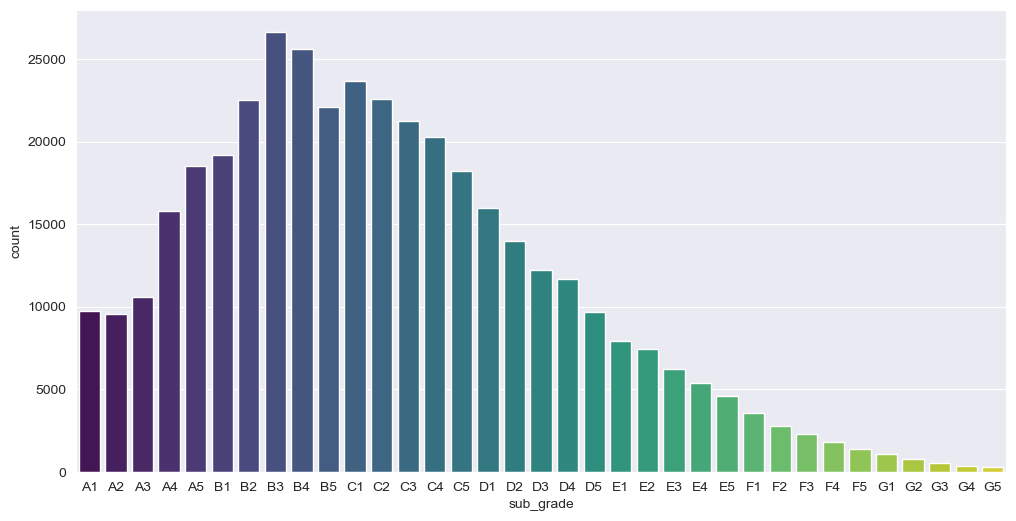

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sub_grade', palette='viridis', order=order_list)

<Axes: xlabel='sub_grade', ylabel='count'>

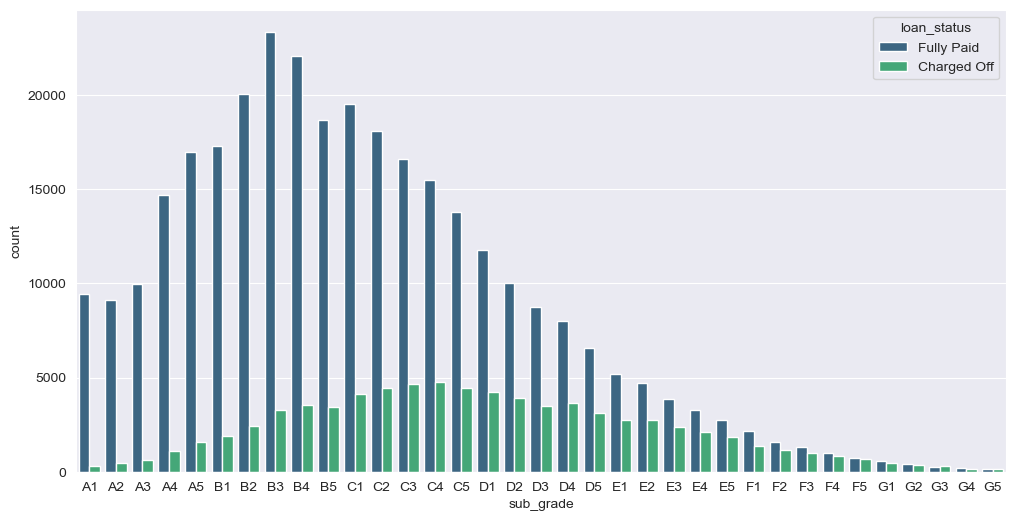

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sub_grade', palette='viridis', order=order_list, hue='loan_status')

**TASK: It looks like F and G subgrades don't get paid back that often. I need to isloate those and recreate the countplot just for those subgrades.**

<Axes: xlabel='sub_grade', ylabel='count'>

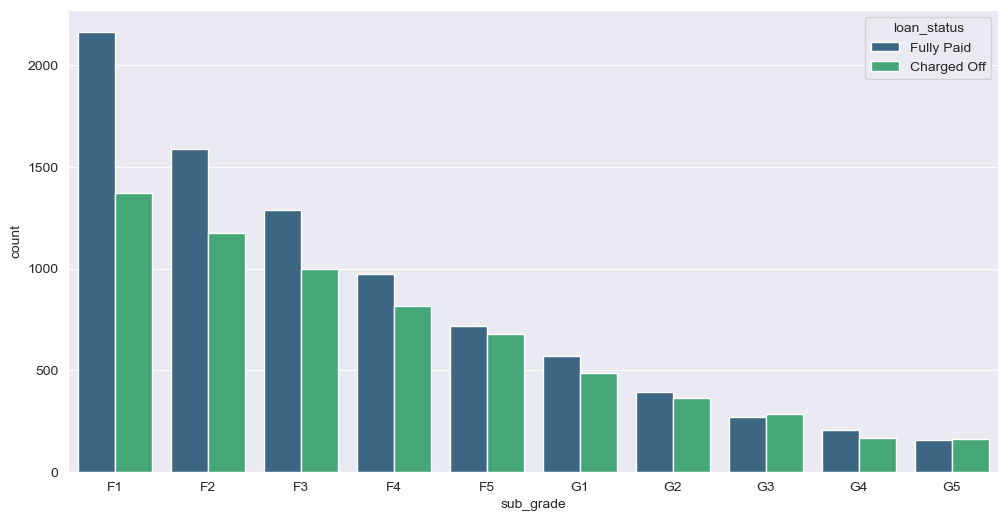

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data = df[(df['grade'] == 'F') | (df['grade'] == 'G')], x='sub_grade', hue='loan_status', palette='viridis',
              order=['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'])

**TASK: Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [25]:
print(df['loan_status'].isnull().sum())
df['loan_status'].unique()b

0


array(['Fully Paid', 'Charged Off'], dtype=object)

I made sure that there is no missing values in this column.

In [26]:
def loan_repaid(status):
    if status == 'Fully Paid':
        return 1
    return 0

In [27]:
df['loan_repaid'] = df['loan_status'].apply(loan_repaid)

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [29]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**TASK: Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'int_rate'),
  Text(1, 0, 'revol_util'),
  Text(2, 0, 'dti'),
  Text(3, 0, 'loan_amnt'),
  Text(4, 0, 'installment'),
  Text(5, 0, 'open_acc'),
  Text(6, 0, 'pub_rec'),
  Text(7, 0, 'pub_rec_bankruptcies'),
  Text(8, 0, 'revol_bal'),
  Text(9, 0, 'total_acc'),
  Text(10, 0, 'annual_inc'),
  Text(11, 0, 'mort_acc')])

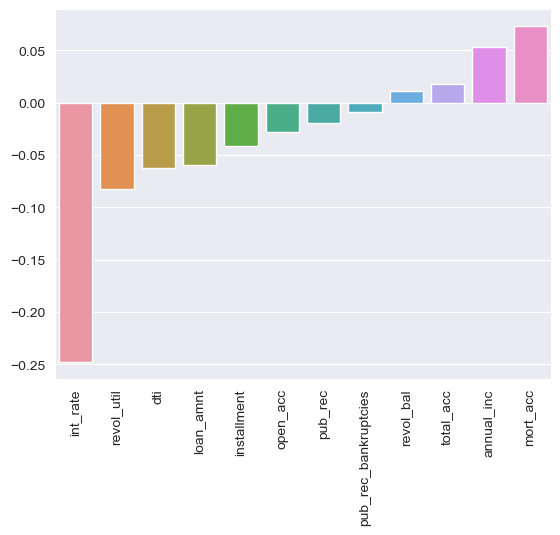

In [30]:
df_corr_new = df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
              'open_acc', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
              'total_acc','mort_acc', 'pub_rec_bankruptcies', 'loan_repaid']]
barplot = sns.barplot(x=df_corr_new.corr()['loan_repaid'].sort_values()[:-1].index,
            y=df_corr_new.corr()['loan_repaid'].sort_values()[:-1].values)
plt.xticks(rotation=90)

Interestingly, int_rate is highly correlated with loan status.


---
# Section 2: Data PreProcessing

**Section Goals: Removing or filling any missing data. I am going to remove unnecessary or repetitive features and convert categorical string features to dummy variables using one-hot encoding.**



In [31]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. I can use a variety of factors to decide whether or not they would be useful to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [32]:
print(f'Length of DataFrame: {len(df)}')

Length of DataFrame: 396030


**TASK: Creating a Series that displays the total count of missing values per column.**

<Axes: >

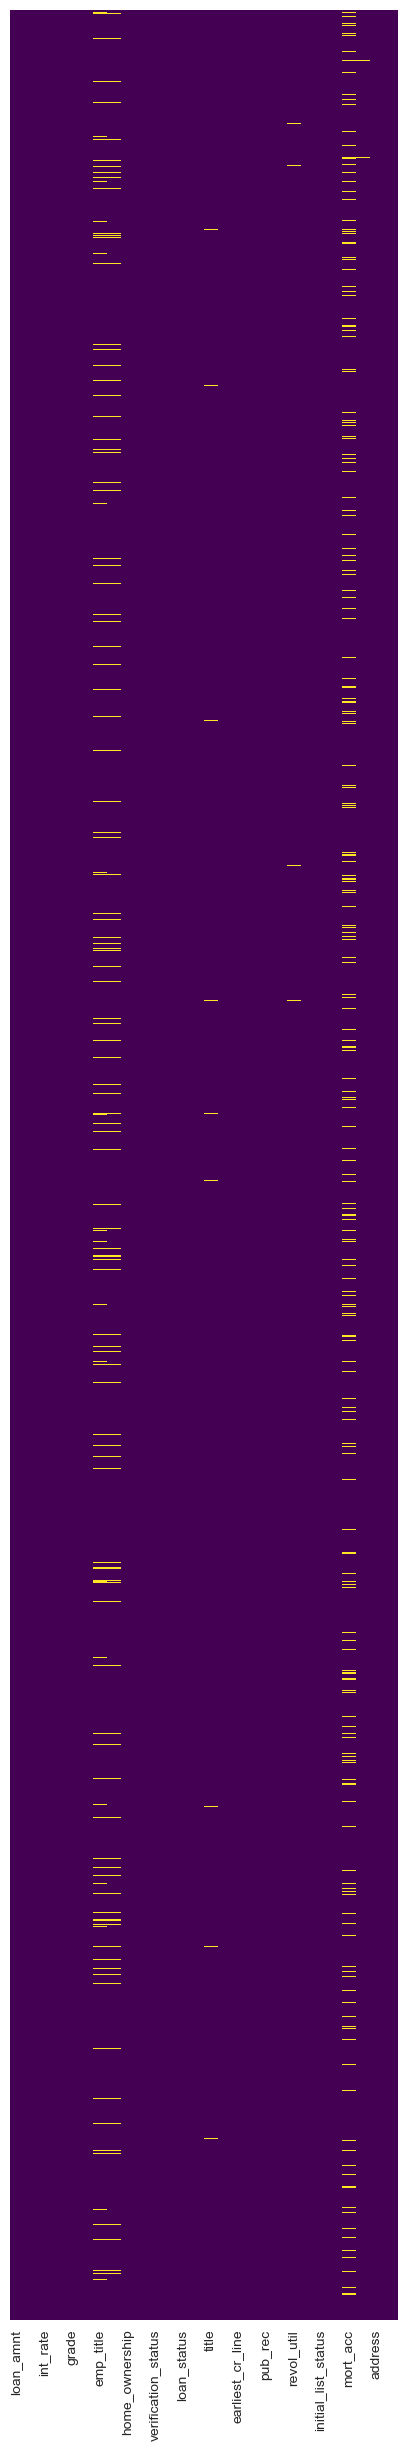

In [33]:
plt.figure(figsize=(5, 30))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In the above figure, the yellow lines in each column shows a missing line of record in that particular column.

Quantifying the missing values for each column.

In [34]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Converting this Series to be in term of percentage of the total DataFrame**

In [35]:
(df.isnull().sum() / len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [36]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [37]:
print(f"Number of unique job titles: {df['emp_title'].nunique()}")

Number of unique job titles: 173105


In [38]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [39]:
df = df.drop('emp_title', axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

**TASK: Creating a count plot of the emp_length feature column and sort them.**

In [41]:
order_list = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

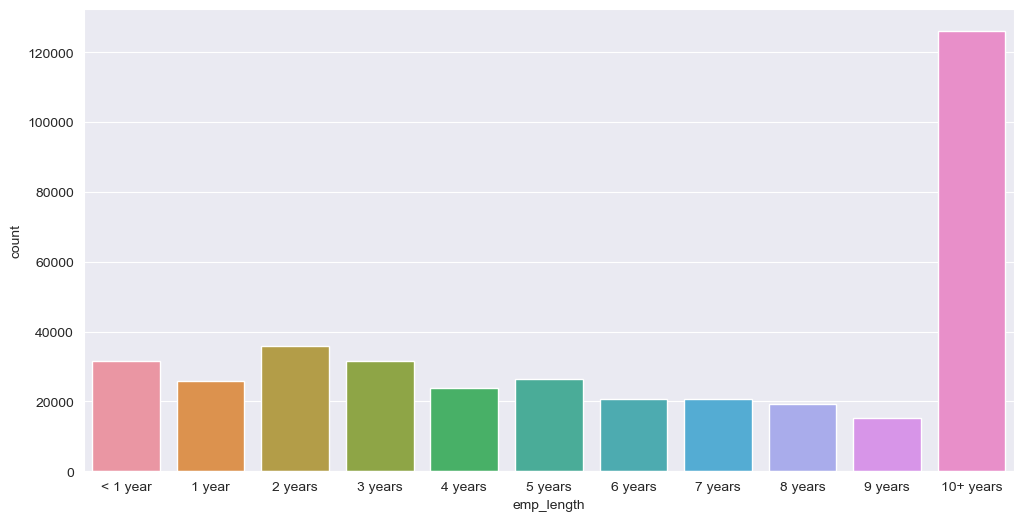

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='emp_length', order=order_list)

**TASK: Plotting out the countplot with a hue separating Fully Paid vs Charged Off**

<Axes: xlabel='emp_length', ylabel='count'>

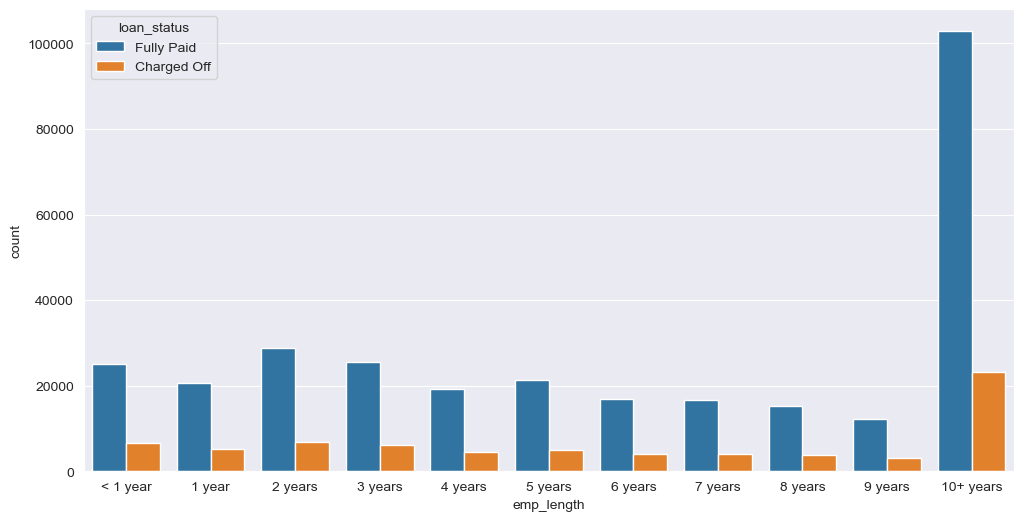

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='emp_length', order=order_list, hue='loan_status')

**Task: Because this still doesn't really inform me if there is a strong relationship between employment length and being charged off, I want the percentage of charge offs per category. Essentially informing me what percent of people per employment category didn't pay back their loan.**

In [44]:
df.groupby('emp_length').count()['loan_repaid']

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_repaid, dtype: int64

In [45]:
rate_of_fault_pay_per_cat = ((df.groupby('emp_length').count()['loan_repaid'] - df.groupby('emp_length').sum()['loan_repaid']) / df.groupby('emp_length').count()['loan_repaid']) * 100
rate_of_fault_pay_per_cat

/var/folders/zg/dm1v_dvs0sd4cjflgfzw86l00000gn/T/ipykernel_1421/2992190769.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rate_of_fault_pay_per_cat = ((df.groupby('emp_length').count()['loan_repaid'] - df.groupby('emp_length').sum()['loan_repaid']) / df.groupby('emp_length').count()['loan_repaid']) * 100


emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_repaid, dtype: float64

<Axes: xlabel='emp_length'>

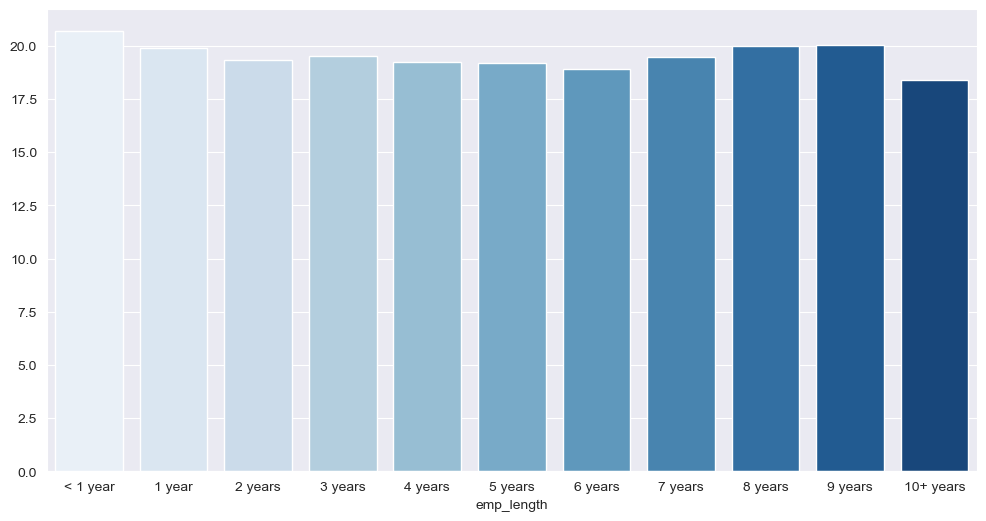

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x=rate_of_fault_pay_per_cat.index, y=rate_of_fault_pay_per_cat.values, order=order_list, palette='Blues')

**TASK: Charge off rates are almost similar across all employment lengths. Although it can be beneficial to keep them, I prefer to drop the emp_length column.**

In [47]:
df = df.drop('emp_length', axis=1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

**TASK: Revisiting the DataFrame to see what feature columns still have missing data.**

In [49]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Reviewing the title column vs the purpose column.**

In [50]:
feat_info('title')
feat_info('purpose')

The loan title provided by the borrower
A category provided by the borrower for the loan request. 


In [51]:
df[['title', 'purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


**TASK: As the title column is simply a string subcategory/description of the purpose column, I want to drop the title column.**

In [52]:
df = df.drop('title', axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

**TASK: Finding out a solution for 'mort_acc'.**

In [54]:
feat_info('mort_acc')

Number of mortgage accounts.


In [55]:
df['mort_acc'].head(10)

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
5    4.0
6    3.0
7    0.0
8    3.0
9    1.0
Name: mort_acc, dtype: float64

**TASK: Creating a value_counts of the mort_acc column.**

In [56]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways I can deal with this missing data. I can attempt to build a simple predictive model to fill it in, such as a linear model, I can just fill it in based on the mean of the other columns, or I can even bin the columns into categories and then set a value per category. There is no 100% correct approach! Let's review the other columns to see which most highly correlates to mort_acc**

In [57]:
df.corr()['mort_acc'].sort_values()

/var/folders/zg/dm1v_dvs0sd4cjflgfzw86l00000gn/T/ipykernel_1421/2388834679.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense!. I will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [58]:
print('Mean of mort_acc column per total_acc')
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


/var/folders/zg/dm1v_dvs0sd4cjflgfzw86l00000gn/T/ipykernel_1421/1884893229.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then I will fill in that missing value with the mean value corresponding to its total_acc value from the Series I created above.**

In [59]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

/var/folders/zg/dm1v_dvs0sd4cjflgfzw86l00000gn/T/ipykernel_1421/3709918517.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [60]:
def fill_mort_acc(total_acc, mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [61]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [62]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: Although revol_util and the pub_rec_bankruptcies have missing data points, they account for less than 0.5% of the total data. So, I will remove the rows that are missing those values in those columns.**

In [63]:
df = df.dropna(subset=['revol_util'], axis=0)

In [64]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [65]:
df = df.dropna(subset=['pub_rec_bankruptcies'], axis=0)

In [66]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**Now that I have done working with the missing data, I just need to deal with the string values due to the categorical columns.**

**TASK: Listing all the columns that are currently non-numeric.**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [68]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what I should do with them.**

---


### term feature

**TASK: Converting the term feature into either a 36 or 60 integer numeric data type.**

In [69]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [70]:
df['term'] = df['term'].apply(lambda term: int(term.strip().split()[0]))

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [72]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**TASK: I already know grade is part of sub_grade, so just drop the grade feature.**

In [73]:
df = df.drop('grade', axis=1)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

**TASK: Converting the subgrade into dummy variables. Then joining these new columns to the original dataframe, and finally dropping the original subgrade column.**

In [75]:
new_features_sub_grade = pd.get_dummies(df['sub_grade'], drop_first=True)

In [76]:
df = df.join(new_features_sub_grade)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

In [78]:
df = df.drop('sub_grade', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   home_ownership        395219 non-null  object 
 5   annual_inc            395219 non-null  float64
 6   verification_status   395219 non-null  object 
 7   issue_d               395219 non-null  object 
 8   loan_status           395219 non-null  object 
 9   purpose               395219 non-null  object 
 10  dti                   395219 non-null  float64
 11  earliest_cr_line      395219 non-null  object 
 12  open_acc              395219 non-null  float64
 13  pub_rec               395219 non-null  float64
 14  revol_bal             395219 non-null  float64
 15  

### verification_status, application_type, initial_list_status, purpose 
**TASK: Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [79]:
print(df['verification_status'].unique())
print(df['application_type'].unique())
print(df['initial_list_status'].unique())
print(df['purpose'].unique())

['Not Verified' 'Source Verified' 'Verified']
['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']
['w' 'f']
['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']


In [80]:
for feature in ['verification_status', 'application_type','initial_list_status','purpose']:
    new_features = pd.get_dummies(df[feature], drop_first=True)
    df = df.join(new_features)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 75 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   home_ownership        395219 non-null  object 
 5   annual_inc            395219 non-null  float64
 6   verification_status   395219 non-null  object 
 7   issue_d               395219 non-null  object 
 8   loan_status           395219 non-null  object 
 9   purpose               395219 non-null  object 
 10  dti                   395219 non-null  float64
 11  earliest_cr_line      395219 non-null  object 
 12  open_acc              395219 non-null  float64
 13  pub_rec               395219 non-null  float64
 14  revol_bal             395219 non-null  float64
 15  

In [82]:
print(df.iloc[0].to_string())

loan_amnt                                                    10000.0
term                                                              36
int_rate                                                       11.44
installment                                                   329.48
home_ownership                                                  RENT
annual_inc                                                  117000.0
verification_status                                     Not Verified
issue_d                                                     Jan-2015
loan_status                                               Fully Paid
purpose                                                     vacation
dti                                                            26.24
earliest_cr_line                                            Jun-1990
open_acc                                                        16.0
pub_rec                                                          0.0
revol_bal                         

In [83]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 71 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   home_ownership        395219 non-null  object 
 5   annual_inc            395219 non-null  float64
 6   issue_d               395219 non-null  object 
 7   loan_status           395219 non-null  object 
 8   dti                   395219 non-null  float64
 9   earliest_cr_line      395219 non-null  object 
 10  open_acc              395219 non-null  float64
 11  pub_rec               395219 non-null  float64
 12  revol_bal             395219 non-null  float64
 13  revol_util            395219 non-null  float64
 14  total_acc             395219 non-null  float64
 15  

### home_ownership
**TASK: Reviewing the value_counts for the home_ownership column.**

In [85]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Converting these to dummy variables, but already replacing NONE and ANY with OTHER, so that I end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then joining them to the original dataframe.**

In [86]:
def home_ownership_replacing(status):
    if (status == 'NONE') or (status == 'ANY'):
        return 'OTHER'
    return status

In [87]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: home_ownership_replacing(x))

In [88]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [89]:
new_features_home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.join(new_features_home_ownership)

In [90]:
new_features_home_ownership

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
396025,0,0,1
396026,0,0,0
396027,0,0,1
396028,0,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 74 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   home_ownership        395219 non-null  object 
 5   annual_inc            395219 non-null  float64
 6   issue_d               395219 non-null  object 
 7   loan_status           395219 non-null  object 
 8   dti                   395219 non-null  float64
 9   earliest_cr_line      395219 non-null  object 
 10  open_acc              395219 non-null  float64
 11  pub_rec               395219 non-null  float64
 12  revol_bal             395219 non-null  float64
 13  revol_util            395219 non-null  float64
 14  total_acc             395219 non-null  float64
 15  

In [92]:
df = df.drop('home_ownership', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 73 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   issue_d               395219 non-null  object 
 6   loan_status           395219 non-null  object 
 7   dti                   395219 non-null  float64
 8   earliest_cr_line      395219 non-null  object 
 9   open_acc              395219 non-null  float64
 10  pub_rec               395219 non-null  float64
 11  revol_bal             395219 non-null  float64
 12  revol_util            395219 non-null  float64
 13  total_acc             395219 non-null  float64
 14  mort_acc              395219 non-null  float64
 15  

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. I want to create a column called 'zip_code' that extracts the zip code from the address column.**

In [93]:
df['zip_code'] = df['address'].apply(lambda address: address.strip().split()[-1])

In [94]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

**TASK: Now, I want make this zip_code column into dummy variables using pandas, then by joining the result and drop the original zip_code column along with dropping the address column.**

In [95]:
new_features_zip_code = pd.get_dummies(df['zip_code'], drop_first=True)

In [96]:
df = df.join(new_features_zip_code)

In [97]:
df = df.drop(['address', 'zip_code'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 81 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   issue_d               395219 non-null  object 
 6   loan_status           395219 non-null  object 
 7   dti                   395219 non-null  float64
 8   earliest_cr_line      395219 non-null  object 
 9   open_acc              395219 non-null  float64
 10  pub_rec               395219 non-null  float64
 11  revol_bal             395219 non-null  float64
 12  revol_util            395219 non-null  float64
 13  total_acc             395219 non-null  float64
 14  mort_acc              395219 non-null  float64
 15  

### issue_d 

**TASK: This would be data leakage, I wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory I wouldn't have an issue_date, so I want to drop this feature.**

In [98]:
feat_info('issue_d')

The month which the loan was funded


In [99]:
df = df.drop('issue_d', axis=1)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   loan_status           395219 non-null  object 
 6   dti                   395219 non-null  float64
 7   earliest_cr_line      395219 non-null  object 
 8   open_acc              395219 non-null  float64
 9   pub_rec               395219 non-null  float64
 10  revol_bal             395219 non-null  float64
 11  revol_util            395219 non-null  float64
 12  total_acc             395219 non-null  float64
 13  mort_acc              395219 non-null  float64
 14  pub_rec_bankruptcies  395219 non-null  float64
 15  

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. I want to extract the year from this feature, and then convert it to a numeric feature 'earliest_cr_year'.**

In [101]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [102]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [103]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [104]:
df = df.drop('earliest_cr_line', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   loan_status           395219 non-null  object 
 6   dti                   395219 non-null  float64
 7   open_acc              395219 non-null  float64
 8   pub_rec               395219 non-null  float64
 9   revol_bal             395219 non-null  float64
 10  revol_util            395219 non-null  float64
 11  total_acc             395219 non-null  float64
 12  mort_acc              395219 non-null  float64
 13  pub_rec_bankruptcies  395219 non-null  float64
 14  loan_repaid           395219 non-null  int64  
 15  

**TASK: Dropping the load_status column we created earlier, since its a duplicate of the loan_repaid column. I'll use the loan_repaid column since its already in 0s and 1s.**

In [105]:
df.drop('loan_status', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   dti                   395219 non-null  float64
 6   open_acc              395219 non-null  float64
 7   pub_rec               395219 non-null  float64
 8   revol_bal             395219 non-null  float64
 9   revol_util            395219 non-null  float64
 10  total_acc             395219 non-null  float64
 11  mort_acc              395219 non-null  float64
 12  pub_rec_bankruptcies  395219 non-null  float64
 13  loan_repaid           395219 non-null  int64  
 14  A2                    395219 non-null  uint8  
 15  

## Train Test Split

**TASK: Setting X and y variables to the values of the features and label.**

In [106]:
X = df.drop('loan_repaid', axis=1)
y = df['loan_repaid']

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Using .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if the model is not using GPU.

----
----

In [107]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Performing a train/test split to split the data to 80% for training, 10% for cross validation, and 10% for testing.**

In [107]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5)

In [109]:
print(f'X_train size: {X_train.shape}')
print(f'y_train size: {y_train.shape}')
print(f'X_cv size: {X_cv.shape}')
print(f'y_cv size: {y_cv.shape}')
print(f'X_test size: {X_test.shape}')
print(f'y_test size: {y_test.shape}')

X_train size: (316175, 78)
y_train size: (316175,)
X_cv size: (39522, 78)
y_cv size: (39522,)
X_test size: (39522, 78)
y_test size: (39522,)


The shape of each junk of data confirms the train/cv/test split has been done as I wished.

## Normalizing the Data

**TASK: Using a MinMaxScaler to normalize the feature data X_train, X_cv, and X_test. As I don't want data leakge from the test set so I only fit on the X_train data.**

Clearly, this normalization could be done by other scalers like StandardScaler, etc.

In [108]:
scaler = MinMaxScaler()

In [109]:
X_train.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
229054,25000.0,60,10.99,543.44,126000.0,16.40,10.0,0.0,25810.0,73.7,...,0,0,0,0,0,1,0,0,0,1990
264411,5000.0,36,18.49,182.00,75000.0,21.01,17.0,0.0,7906.0,40.8,...,0,0,0,0,1,0,0,0,0,1997
39343,6400.0,36,18.54,233.12,60000.0,11.12,5.0,0.0,11443.0,78.4,...,0,0,0,1,0,0,0,0,0,2011
246085,27575.0,36,10.99,902.64,56000.0,14.38,14.0,0.0,35901.0,42.6,...,0,0,0,1,0,0,0,0,0,1997
323486,22000.0,36,10.99,720.15,77000.0,19.95,9.0,0.0,22126.0,63.6,...,0,0,0,0,0,0,0,0,0,2004


In [110]:
X_train = scaler.fit_transform(X_train)

In [111]:
X_train

array([[0.62025316, 1.        , 0.22088041, ..., 0.        , 0.        ,
        0.66666667],
       [0.11392405, 0.        , 0.51305025, ..., 0.        , 0.        ,
        0.76811594],
       [0.14936709, 0.        , 0.51499805, ..., 0.        , 0.        ,
        0.97101449],
       ...,
       [0.18987342, 0.        , 0.26490066, ..., 0.        , 0.        ,
        0.7826087 ],
       [0.36708861, 0.        , 0.42384106, ..., 0.        , 0.        ,
        0.76811594],
       [0.62025316, 0.        , 0.59096221, ..., 0.        , 0.        ,
        0.46376812]])

In [112]:
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

# Creating the Model

**TASK:I want to build a sequential model to be trained on the data. I have unlimited options here, but here is what I want to use: a model that goes 78 --> 39 --> 19--> 1 output neuron. By Exploiting [Dropout layers].**

In [113]:
model = Sequential([
    Dense(units=78, activation='relu', name='hidden_layer1'),
    Dropout(rate=0.2, name='droputt1'),
    Dense(units=39, activation='relu', name='hidden_layer2'),
    Dropout(rate=0.2, name='droputt2'),
    Dense(units=19, activation='relu', name='hidden_layer3'),
    Dropout(rate=0.2, name='droputt3'),
    Dense(units=1, activation='sigmoid', name='output_layer'),
])


model.compile(optimizer='adam', loss='binary_crossentropy')

**TASK: Defining early stopping criteria to avoid overfitting with respect to minimizing my binary_cross enrtropy loss function and paitence of 20 epoches.**

In [114]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

**TASK: Fitting the model to the training data for at least 25 epochs. Also, I want to add in the validation data for later plotting.**

In [115]:
model.fit(X_train,
          y_train,
          batch_size=256,
          epochs=200,
          validation_data=(X_cv, y_cv),
          callbacks=[early_stopping]
         )

Epoch 1/200
1236/1236 [==============================] - 1s 850us/step - loss: 0.3052 - val_loss: 0.2629
Epoch 2/200
1236/1236 [==============================] - 1s 790us/step - loss: 0.2662 - val_loss: 0.2618
Epoch 3/200
1236/1236 [==============================] - 1s 786us/step - loss: 0.2637 - val_loss: 0.2609
Epoch 4/200
1236/1236 [==============================] - 1s 786us/step - loss: 0.2625 - val_loss: 0.2600
Epoch 5/200
1236/1236 [==============================] - 1s 790us/step - loss: 0.2617 - val_loss: 0.2599
Epoch 6/200
1236/1236 [==============================] - 1s 782us/step - loss: 0.2608 - val_loss: 0.2598
Epoch 7/200
1236/1236 [==============================] - 1s 778us/step - loss: 0.2604 - val_loss: 0.2597
Epoch 8/200
1236/1236 [==============================] - 1s 787us/step - loss: 0.2601 - val_loss: 0.2601
Epoch 9/200
1236/1236 [==============================] - 1s 783us/step - loss: 0.2598 - val_loss: 0.2598
Epoch 10/200
1236/1236 [==============================]

1236/1236 [==============================] - 1s 789us/step - loss: 0.2524 - val_loss: 0.2589
Epoch 79/200
1236/1236 [==============================] - 1s 790us/step - loss: 0.2522 - val_loss: 0.2598
Epoch 80/200
1236/1236 [==============================] - 1s 791us/step - loss: 0.2519 - val_loss: 0.2588
Epoch 80: early stopping


In [116]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 78)                6162      
                                                                 
 droputt1 (Dropout)          (None, 78)                0         
                                                                 
 hidden_layer2 (Dense)       (None, 39)                3081      
                                                                 
 droputt2 (Dropout)          (None, 39)                0         
                                                                 
 hidden_layer3 (Dense)       (None, 19)                760       
                                                                 
 droputt3 (Dropout)          (None, 19)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 2

# Section 3: Evaluating Model Performance.

**TASK: Plotting out the validation loss versus the training loss.**

In [117]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.305209,0.262928
1,0.266186,0.261762
2,0.263696,0.260876
3,0.262545,0.260024
4,0.261651,0.259933
...,...,...
75,0.252276,0.258494
76,0.252190,0.259484
77,0.252371,0.258936
78,0.252237,0.259824


<Axes: >

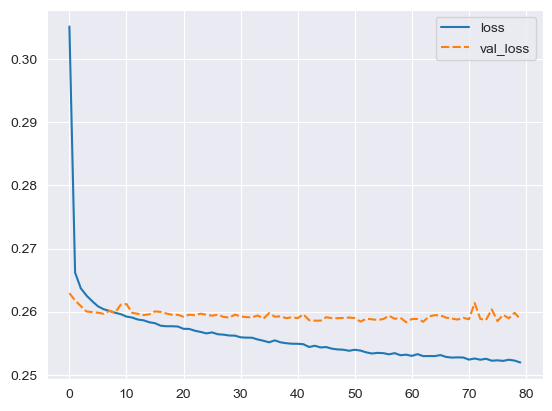

In [118]:
sns.lineplot(data=losses)

**TASK: Creating predictions from the X_cv set and display a classification report and confusion matrix for the X_cv set.**

In [119]:
prediction_cv = model.predict(X_cv)
prediction_cv

1236/1236 [==============================] - 0s 217us/step


array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [1.        ],
       [0.67804337],
       [1.        ]], dtype=float32)

In [120]:
class_predictions_cv = np.where(prediction_cv > 0.5, 1,0)

In [121]:
class_predictions_cv

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [122]:
print(confusion_matrix(y_cv, class_predictions_cv))
print('\n')
print(classification_report(y_cv, class_predictions_cv))

[[ 3576  4237]
 [  147 31562]]


              precision    recall  f1-score   support

           0       0.96      0.46      0.62      7813
           1       0.88      1.00      0.94     31709

    accuracy                           0.89     39522
   macro avg       0.92      0.73      0.78     39522
weighted avg       0.90      0.89      0.87     39522



**TASK: Given the customer below, would model offers this person a loan?**

In [123]:
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [124]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

/Users/mohammadkheirkhah/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [125]:
new_customer.shape

(1, 78)

In [126]:
pred_cu = model.predict(new_customer)
pred_cu

1/1 [==============================] - 0s 11ms/step


array([[0.60770875]], dtype=float32)

In [127]:
pred_cu = np.where(pred_cu > 0.5, 1,0)

In [128]:
pred_cu

array([[1]])

**TASK: Now checking to see if this person actually end up paying back their loan?**

In [129]:
df.iloc[random_ind]['loan_repaid']

1.0

**TASK: Now Prediction on X_test and evaluating the model Perfromance in our new unseen data.**

In [130]:
prediction_test = model.predict(X_test)
prediction_test

1236/1236 [==============================] - 0s 223us/step


array([[0.74749047],
       [0.87153   ],
       [1.        ],
       ...,
       [1.        ],
       [0.869573  ],
       [0.82458067]], dtype=float32)

In [131]:
class_predictions_test = np.where(prediction_test > 0.5, 1,0)

In [132]:
print(confusion_matrix(y_test, class_predictions_test))
print('\n')
print(classification_report(y_test, class_predictions_test))

[[ 3479  4232]
 [  164 31647]]


              precision    recall  f1-score   support

           0       0.95      0.45      0.61      7711
           1       0.88      0.99      0.94     31811

    accuracy                           0.89     39522
   macro avg       0.92      0.72      0.77     39522
weighted avg       0.90      0.89      0.87     39522



Results: As it can be seen, the model is achieved f1-score of 61% and 94% for 0(s) and 1(s), respectively which is acceptable but can be improved by the future works of:

1. More feature engineering
2. Different architecture for DL model
3. Investigation of the role of threshold 0.5 and adjust it to the optimal value by looking to AUC and ROC.
4. Tune the hyper parameter of learning rate (alpha) and etc. using grid search
5. and so on.